In [2]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import ipywidgets as widgets
from IPython import display
import matplotlib.pyplot as plt

In [3]:
table=pd.read_csv('Titanic.csv')

In [4]:
#Rellenando las edades con la media del resto de edades
media = table.Age.mean()
tableCompleteData = table.fillna(value=media)
#tableCompleteData

In [5]:
#Número de sobrevivientes
numberOfSurvivors = 0
for index, row in table.iterrows():
    if row.Survived == 1:
        numberOfSurvivors += 1
        
#print('El número de sobrevivientes fue de:', numberOfSurvivors, 'personas')

In [6]:
#Media de: edades, precio y ticketes
MediaEdades = 0
MediaPrecios = 0
MediaTickets = 0
numberOfPeole = table.Name.count()
for index, row in tableCompleteData.iterrows():
    MediaEdades  += row.Age  
    MediaPrecios += row.Fare
    MediaTickets += 1
MediaEdades  = MediaEdades  / numberOfPeole
MediaPrecios = MediaPrecios / numberOfPeole
MediaTickets = MediaTickets / numberOfPeole

#print('La media de edades es............:', MediaEdades)
#print('La media de precios de ticktes es:', MediaPrecios)
#print('La media de tickets es...........:', MediaTickets)

In [7]:
#Mediana de: edades, precios y ticketes
MedianaEdades  = tableCompleteData.sort_values(by=['Age'])
MedianaPrecios = tableCompleteData.sort_values(by=['Fare'])
MedianaTickets = tableCompleteData.sort_values(by=['Ticket'])
if numberOfPeole % 2 == 0:
    print('Soy una longitud par')
else:
    posicion = numberOfPeole - 1
    posicion = (posicion/2) + 1
    posicion
  
#print('La mediana de edades es.:', MedianaEdades.iloc[int(posicion)].Age)
#print('La mediana de precios es:', MedianaPrecios.iloc[int(posicion)].Fare)
#print('La mediana de tickets es:', MedianaTickets.iloc[int(posicion)].Ticket)

In [8]:
#Moda de: edades, precios y tickets
tempAge = 0
tempFare = 0
tempTicket = 0
listaDeEdades = []
listaDePrecios = []
listaDeTicketes = []
for index, row in tableCompleteData.iterrows():
    tempAge = row.Age 
    tempFare = row.Fare
    tempTicket = row.Ticket
    listaDeEdades.append(tempAge)
    listaDePrecios.append(tempFare)
    listaDeTicketes.append(tempTicket)

numeroDeVecesAge = 0
listaEdadesRepetidas = {}
for x in listaDeEdades:
    numeroDeVecesAge = listaDeEdades.count(x)
    listaEdadesRepetidas[x] = numeroDeVecesAge

numeroDeVecesFare = 0
listaPreciosRepetidos = {}  
for x in listaDePrecios:
    numeroDeVecesFare = listaDePrecios.count(x)
    listaPreciosRepetidos[x] = numeroDeVecesFare

numeroDeVecesTicket = 0
listaTicketesRepetidos = {} 
for x in listaDeTicketes:
    numeroDeVecesTicket = listaDeTicketes.count(x)
    listaTicketesRepetidos[x] = numeroDeVecesTicket

temporalAge = 1
temporalEdad = 0
for edad, numeroVeces in listaEdadesRepetidas.items():
    if numeroVeces > temporalAge:
        temporalAge = numeroVeces
        temporalEdad = edad
#print('La moda de las edades es..:', temporalEdad, 'se enuentra repetida:', temporalAge)

temporalFare = 1
temporalPrecios = 0
for precio, numeroVeces in listaPreciosRepetidos.items():
    if numeroVeces > temporalFare:
        temporalFare = numeroVeces
        temporalPrecios = precio
#print('La moda de los precios es.:', temporalPrecios, 'se enuentra repetido:', temporalFare)

temporalTicket = 1
temporalticketes = 0
for ticket, numeroVeces in listaPreciosRepetidos.items():
    if numeroVeces > temporalTicket:
        temporalTicket = numeroVeces
        temporalticketes = ticket
#print('La moda de los ticketes es:', temporalticketes, 'se enuentra repetido:', temporalTicket)

In [9]:
#Varianza de edades y precios
exponencialEdad = 0
exponencialPrecio = 0
edad = 0
precio = 0
varianzaEdades = 0
varianzaPrecios = 0
for index, row in tableCompleteData.iterrows():
    edad = row.Age
    precio = row.Fare
    exponencialEdad += (edad * edad)
    exponencialPrecio += (precio * precio)
varianzaEdades = (exponencialEdad/numberOfPeole) - (MediaEdades * MediaEdades)
varianzaPrecios = (exponencialPrecio/numberOfPeole) - (MediaPrecios * MediaPrecios)
#print('La varianza de las edades es:', varianzaEdades)
#print('La varianza de precios es...:', varianzaPrecios)


In [10]:
#Número de hombres y mujeres
countFemale = 0
countMale = 0
for index, row in tableCompleteData.iterrows():
    if row.Sex == 'female':
        countFemale += 1
    else:
        countMale += 1
#print('El numero de mujeres que abordaron el titanic fue de:', countFemale, 'y de hombres fue de:', countMale)    

In [44]:
#Que relación existe con los que murieron con respecto a la edad y clase social
survived = tableCompleteData.loc[tableCompleteData.Survived == 0]
survivedPclass1 = widgets.Output()
survivedPclass2 = widgets.Output()
survivedPclass3 = widgets.Output()
estrato1 = survived.loc[survived.Pclass == 1]
estrato2 = survived.loc[survived.Pclass == 2]
estrato3 = survived.loc[survived.Pclass == 3]
with survivedPclass1:
    display.display(estrato1[['Age','Pclass']])
with survivedPclass2:
    display.display(estrato2[['Age','Pclass']])
with survivedPclass3:
    display.display(estrato3[['Age','Pclass']])
tablas = widgets.HBox([survivedPclass1, survivedPclass2, survivedPclass3])

#tablas

In [12]:
#Promedio de las edades según el estrato
promedioEdadesEstrato1 = 0
for index, row in estrato1.iterrows():
    promedioEdadesEstrato1 += row.Age
promedioEdadesEstrato1 = promedioEdadesEstrato1 / len(estrato1)

promedioEdadesEstrato2 = 0
for index, row in estrato2.iterrows():
    promedioEdadesEstrato2 += row.Age
promedioEdadesEstrato2 = promedioEdadesEstrato2 / len(estrato2)
    
promedioEdadesEstrato3 = 0
for index, row in estrato3.iterrows():
    promedioEdadesEstrato3 += row.Age
promedioEdadesEstrato3 = promedioEdadesEstrato3 / len(estrato3)

#print('El promedio de edades para la clase social 1 es:', promedioEdadesEstrato1)
#print('El promedio de edades para la clase social 2 es:', promedioEdadesEstrato2)
#print('El promedio de edades para la clase social 3 es:', promedioEdadesEstrato3)

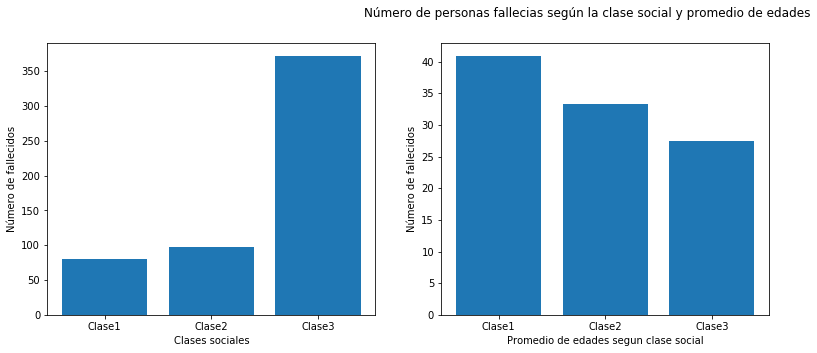

In [47]:
#Gráficos sobre las personas que murieron con respecto a la edad y clase social
#bar, scatter, plot
pclass = ['Clase1', 'Clase2', 'Clase3']
valuesPclass= [len(estrato1), len(estrato2), len(estrato3)]
averageAge = ['Clase1', 'Clase2', 'Clase3']
valuesAverageAge= [promedioEdadesEstrato1, promedioEdadesEstrato2, promedioEdadesEstrato3]
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.bar(pclass, valuesPclass)
plt.ylabel('Número de fallecidos')
plt.xlabel('Clases sociales')
plt.subplot(132)
plt.bar(averageAge, valuesAverageAge)
plt.ylabel('Número de fallecidos')
plt.xlabel('Promedio de edades segun clase social')
plt.suptitle('Número de personas fallecias según la clase social y promedio de edades')
plt.show()